<a href="https://colab.research.google.com/github/praveensambari/NNDL/blob/main/18K41A0551_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [13]:
df=pd.read_excel("pressure_wts.xlsx")
df.head()

,pressure,weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pressure  30 non-null     float64
 1   weight    30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


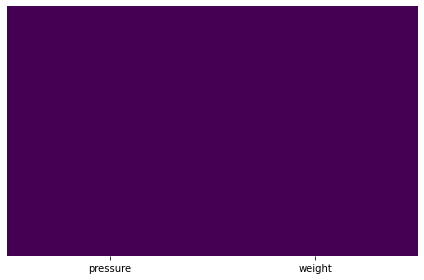

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [17]:
f_data = df[(z < 3).all(axis=1)]
f_data.head()

,pressure,weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [18]:
print(len(df))
print(len(f_data))
if(len(df) == len(f_data)):
    print('Hence there are - No outliners')

30
30
Hence there are - No outliners


In [19]:
def min_max_scaling(df):
  df_norm = df.copy()
  ct=0
  newmin=0
  newmax=1
  for column in df_norm.columns:
    df_norm[column]=(df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())*(newmax-newmin)+newmin
  return df_norm

df_norm = min_max_scaling(df)
df_norm.head()

,pressure,weight
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm.pressure, df_norm.weight, test_size = 0.10, random_state = 42)

In [21]:
x_train.head()

17    0.271626
8     0.775087
9     0.489619
28    0.382353
24    1.000000
Name: pressure, dtype: float64

In [22]:
y_train.head()

17    0.602094
8     0.000000
9     0.584061
28    0.567772
24    0.605585
Name: weight, dtype: float64

In [23]:
x_test

27    0.340830
15    0.060554
23    0.676471
Name: pressure, dtype: float64

In [24]:
y_test

27    0.600931
15    0.578825
23    0.502036
Name: weight, dtype: float64

In [25]:
for i,j in zip(x_train,y_train):
   print(i)
   print(j)

0.2716262975778547
0.6020942408376962
0.7750865051903114
0.0
0.4896193771626297
0.5840605002908669
0.3823529411764705
0.5677719604421175
1.0
0.6055846422338569
0.6435986159169551
0.5799883653286793
0.22318339100346007
0.9953461314717855
0.6280276816608996
0.9639325189063407
0.06920415224913495
0.5794066317626527
0.8615916955017301
0.026178010471204185
0.532871972318339
0.6020942408376962
0.9273356401384083
0.5730075625363582
0.20069204152249126
0.5590459569517161
0.20934256055363312
0.9906922629435717
0.45847750865051906
0.9552065154159393
0.23702422145328725
0.6172193135543917
0.9065743944636677
1.0
0.4740484429065743
0.6172193135543917
0.24221453287197234
0.6207097149505525
0.8235294117647058
0.5927865037812683
0.6193771626297577
0.6707388016288539
0.45674740484429055
0.5741710296684117
0.0
0.914485165794066
0.20069204152249126
0.5218150087260033
0.20242214532871977
0.5654450261780103
0.7474048442906576
0.6061663757998834
0.9100346020761245
0.7271669575334498


In [26]:
import sympy as sym
from sympy import *
import random

#step 1 Initialization
mi=1 #model parameters
ci=-1
lr = 0.1  #learning rate
epochs = 1500 #maximum iterations
iter = 0
nsi = len(x_train)

while iter<epochs: #step 7 check for convergence criteria
  #step 2: start the iter and update while the loop 
  iter = iter+1
  #print("ITERATION {}".format(iter))
  
  #step 3: Error function for Gradient descent
  #declare the variables that you will be using in the error function
  x=sym.Symbol('x')
  y=sym.Symbol('y')
  m=sym.Symbol('m')
  c=sym.Symbol('c')
  ns = sym.Symbol('ns')
  E=(0.5)/ns*(y-m*x-c)**2  #ERROR FUNCTION
 

  derivE_m=sym.diff(E,m) #differentiation of E wrto m
  derivE_c=sym.diff(E,c)  #differentiate E wrto c
  #print(derivE_m)
  #print(derivE_c)
  #print('after subs m and c')
  #print('in derivE_m')
  derivE_m = derivE_m.subs(m, mi) 
  derivE_m = derivE_m.subs(c, ci)
  #print(derivE_m)
  #print('in derivE_c')
  derivE_c = derivE_c.subs(m, mi) 
  derivE_c = derivE_c.subs(c, ci)
  #print(derivE_c)
  #print('after substitution ns value')
  derivE_m = derivE_m.subs(ns,nsi)
  derivE_c = derivE_c.subs(ns,nsi)
  #substitution of the samples all as a single batch
  derivE_m_final=0
  derivE_c_final=0
  for i,j in zip(x_train,y_train):
    xi=i
    yi=j
    #print('x{} '.format(batch)+"{}".format(x_train['x'][batch]))
    #print('y{} '.format(batch)+"{}".format(y_train['y'][batch]))
    l1= derivE_m.subs(x,xi)
    l2= l1.subs(y,yi)
    #print(l2)  
    derivE_m_final+=l2
    l1 = derivE_c.subs(x,xi)
    l2=l1.subs(y,yi)
    derivE_c_final+=l2
  #print('Final E_m')
  #print(derivE_m_final)
  #print('Final E_c')
  #print(derivE_c_final)
  #step 4 - find change in model parms
  delta_m = -(lr)*derivE_m_final
  delta_c = -(lr)*derivE_c_final

  #step 5 - update model params
  mi = mi+delta_m
  ci = ci+delta_c
  #print('m = {}'.format(mi)+' c = {}'.format(ci))
  #print('---------------------------------------------------------')

#step 8
print('Final global minima m and c values:')
print('m = {}'.format(mi))
print('c = {}'.format(ci))

Final global minima m and c values:
m = -0.203679955314259
c = 0.739278761032763


In [27]:
y_train_pred = []
for i in x_train:
  ycalc = mi*i+ci
  y_train_pred.append(ycalc)

In [28]:
type(x_train)

pandas.core.series.Series

In [29]:
x_train_list = list(x_train) #typecasting tuple to list
y_train_list = list(y_train)

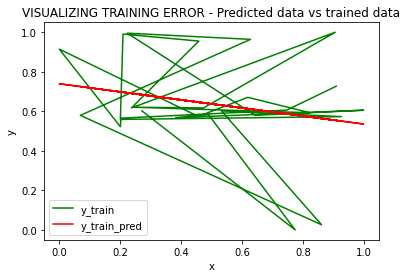

In [30]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR - Predicted data vs trained data")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

In [31]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y_train, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_train, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.22922757849721861
Mean square error 0.052545282743698525
Mean absolute error 0.1660604061949474


In [32]:
y_test_pred = []
for i in x_test:
  ycalc = mi*i+ci
  y_test_pred.append(ycalc)
y_test_pred

[0.669858430242263, 0.726945199724807, 0.601495261849588]

In [33]:
y_test_list = list(y_test)

mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
[-0.0689276565366207, -0.148120301528181, -0.0994591943684947]
Mean Square Error:  -0.105502384144432


In [34]:
mse = math.sqrt(mean_squared_error(y_test, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.11042761868430614
Mean square error 0.012194258968286518
Mean absolute error 0.10550238414443207


In [35]:
x_min = df['pressure'].min()
x_max = df['pressure'].max()
y_min = df['weight'].min()
y_max = df['weight'].max()

In [36]:
x =x1 = float(input("Enter pressure of liquid nitrogen value :"))
x = (x - x_min)/(x_max - x_min)
y = mi*x + ci
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen for pressure {x1} is : {y}")


Enter pressure of liquid nitrogen value :150
weight of liquid nitrogen for pressure 150.0 is : 480.596813084401
